# PDA data science - Yahoo Finance
<div class="alert alert-block alert-info"> 
    Notebook 3: by michael.ferrie@edinburghcollege.ac.uk <br> Edinburgh College, March 2022
</div>

## Introduction to API's

For those who might be unfamiliar, API stands for Application Programming Interface. An API is actually an interface that has a set of functions. These set of functions allow programmers to acquire some specific features or the data of an application. Web API is an API as the name suggests, it can be accessed over the web using the HTTP protocol. It is a framework that helps you to create and develop HTTP based RESTFUL services. Once we can access an API programmatically we can create requests to send to it in order to return data that is useful to us. Many companies offer useful public API's and python allows us to connect to these.

## Yahoo Finance
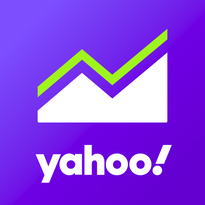

Yahoo Finance used to have their own official API, but this was decommissioned in May 2017, following wide-spread misuse of data. These days a range of unofficial APIs and libraries exist to access the same data, including yfinance.

The project yfinance was developed by [Ran Aroussi](https://aroussi.com/about) and offers a replacement for the old Yahoo API and we can use it with Python to download market data from Yahoo! finance. Before getting started you should install the library with pip:

`pip install yfinance`

With yfinance we can obtain historical and real time data for a variety of financial markets and products, as shown on [Yahoo Finance](https://finance.yahoo.com/). 

A stock ticker reports transaction and price data, these tickers, update continuously throughout the day. Have a look at the list of [tickers](https://finance.yahoo.com/trending-tickers).

OHLC is a financial term for Open Close Low High, this is the value of a stock when the market opens and closes and the lowest point and highest point in a particular duration.

Read through the notebook and run each of the examples then answer the [questions](#Questions) at the end.

## Getting a reply from the API

* First we will import the `yfinance` library, then using the Ticker module, we can search for information on Google, they have the abbreviation GOOG, run the following you should get a response from the API. The Ticker module, allows you to access ticker data in a more Pythonic way. Ticker.info provides us with a lot of data on a company, have a look.

In [1]:
# import library
import yfinance as yf

# assign data to a variable, then print result
goog = yf.Ticker("GOOG")
print(goog.info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 156500, 'longBusinessSummary': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other servi

## Specifying date ranges
We can specify a date range for data to be returned, The full range of intervals available are:

1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

In [ ]:
# specify 3 days with '3d' of data from the API
data = yf.download(['GOOG'], period='3d')
print(data)

# the data comes from the API as a pandas dataframe
print(type(data))

## Access Microsoft finances

Here is how to get some data on Microsoft, we will explore some of the options of the library.All of the available options are here: https://pypi.org/project/yfinance/

In [ ]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show major holders
msft.major_holders

# show cashflow
msft.cashflow

# print some of the data
print(msft.cashflow)
print(msft.major_holders)

# show the data type
print(type(msft.cashflow))

## Multiple stocks

We can download data for one ticker using the Ticker object and multiple tickers using the download method.

In [ ]:
# get data for google and meta for one month
df = yf.download(['GOOG','META'], period='1mo')

# use head to show only the top of the dataframe
df.head()

In [ ]:
# Specify the date range and group by ticker
# Remember dates are in american middle endian
df = yf.download(['GOOG','META'], start='2022-01-01', 
                 end='2022-01-31', group_by='ticker')
df.head()

## Bitcoin value in USD
Let's have a look at some Bitcoin data, this will pull the Bitcoin value for the first week in February 2022, we can set the interval to 1 hour so that we can see the value change.

In [ ]:
df = yf.download(['BTC-USD'], start='2022-02-01', end='2022-02-07', interval='1h')
df.head()
print(df)

## Get some statistics from the data
Once we get the data into a pandas dataframe we can run many possible operations on it, have a look at the [list](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). There are so many possibilities, the trick is being able to understand the documentation so you can use them. Here are some examples:

In [ ]:
# Describe will give you an overview of the data
df.describe()

In [ ]:
# Access a specific column in the data with []
print(df['High'].mean())
print(df['High'].min())
print(df['High'].max())
print(df['High'].median())

## Visualise the data
Pandas has a simple plot function and it will let us access specific columns in the dataframe, it understands the shape of the data and it is easy to work with. This will allow us to see the Bitcoin value in USD over the week that we have data for. Something obviously happened on the 4th of February to cause the spike. The best day to buy bitcoin that week would have been on the 3rd.

In [ ]:
# Plot the open column
df["Open"].plot()

In [ ]:
# Plot the close column
df["Close"].plot()

In [ ]:
# Adding some extra details to the plot
df['Open'].plot(kind='line', title="My Plot", xlabel="Date", ylabel="Value in USD")

## Multiple line Plots
Now if we want to compare two plots side by side we need another library, if you have not already, install Matplotlib, we need to use pyplot from this library for this next task.

`pip install matplotlib`

First we want to pass multiple columns in the data frame to the plot function, and assign them a colour, then we can add a title and some labels, and a legend.

In [ ]:
# import pyplot
import matplotlib.pyplot as plt

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['High'].plot(label='High', color='blue')
df['Low'].plot(label='Low', color='red')

# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
  
# adding labels to the axes, add a legend
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.legend()

## Figure size

Our multi line plot looks a bit squashed, here are some options to make it better, `figsize` lets us specify the size of the chart in <b>inches</b>, by default all charts come out as 6.4x4.8 inches. The chart will look better at a bigger size, let us also specify the quality of the image as 150 dpi. The plot will be easier to see if we increase this, but it might take slightly longer to render.

In [ ]:
# set the plot size and image quality
plt.figure(figsize=(16, 8), dpi=300)

# use the plot method on each of the columsn in the dataframe
df['Open'].plot(label='Open', color='green')
df['Close'].plot(label='Close', color='orange')
df['Low'].plot(label='Low', color='red')
df['High'].plot(label='High', color='blue')


# adding title to the plot
plt.title('Bitcoin in USD for Week 1 in February')
  
# adding labels to the axes, add a legend, add gridlines
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()

# Questions
Add your solution to the questions below

## Plot the Bitcoin value in USD using the high column for the whole month of January 2021, set the interval to 1 hour?

In [ ]:
# your answer below this line


## Create a plot of the Bitcoin value in USD using the high column for the whole year of 2021, set the interval to 1 day?

In [ ]:
# your answer below this line


## Plot the Bitcoin value in USD using the close column for as far back as you can get data for, this could be a number of years?

In [ ]:
# your answer below this line


## Go to the [Cryptocurency tickers list](https://finance.yahoo.com/cryptocurrencies) find the name of the Etherium USD ticker and then create a plot of the value of Etherium in USD using the high column for the whole year of 2021, set the interval to 1 day?

In [ ]:
# your answer below this line


## Go to the [Most active tickers list](https://finance.yahoo.com/most-active) and find the top two most active stocks. Create a plot that compares their high value for every day in 2021. The plot should have two lines in different colours, there should be a legend and axis labels.

In [ ]:
# your answer below this line


## Adapt your plot from the previous question to show the high value of the top 4 stocks in the list?

In [ ]:
# your answer below this line


## Go to the [FIAT Currency tickers list](https://finance.yahoo.com/currencies) and find the tickers for EUR/USD and GBP/USD, create a plot that shows the value from the close column for the last 3 years every day for each of the tickers.

In [ ]:
# your answer below this line


## Adapt the chart from the previous question to add additional lines for the AUD/USD CAD/USD and NZD/USD, give each line an appropriate colour and add a legend and axis labels, print this chart out in 150dpi and make it 16x8 inches. Add gridlines to the plot?

In [ ]:
# your answer below this line
